## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **1st November 2023 at 11:59 pm**. 

6. Some questions in this assignment do not have a single correct answer. As data visualization is subject to interpretation, any logically sound answer / explanation is acceptable.

7. There is a bonus question worth 20 points. However, there is no partial credit for the bonus question. You will get 20 or 0. If everything is correct, you can score 120 out of 100 in the assignment.

# Exploring factors associated with profitability of a movie {-}
In this assignment we'll attempt to find the factors (or variables) that make a movie profitable.

Read the movies data from [here](https://raw.githubusercontent.com/vega/vega-datasets/master/data/movies.json), in a Pandas DataFrame named as `movies_data`. The profit of movie is defined as:

$$profit = Worldwide \ Gross - Production \ Budget$$

In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/movies.json'

movies_data = pd.read_json(url)

movies_data.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


## Time trend
Let us analyze if the profitability of a movie is associated with the time of its release.

### Month of release
#### 
Make an appropriate plot to visualize the mean profit of movies released each month.

**Hint:** 

1. Use the Pandas function [to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to convert *Release Date* to a `datetime` datatype.

2. Use the library [`datetime`](https://docs.python.org/3/library/datetime.html) to extract the month from *Release Date*.

*(6 points)*

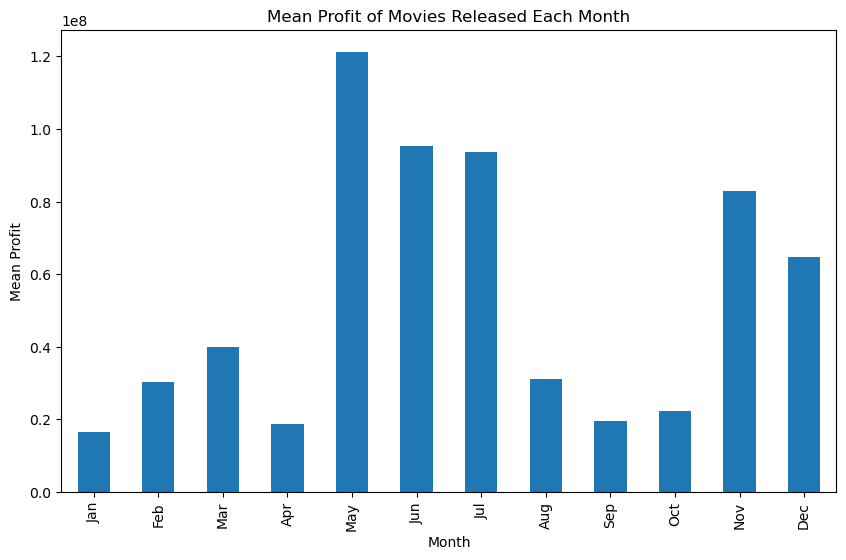

In [16]:
import datetime
import matplotlib.pyplot as plt
movies_data = movies_data.dropna(subset=['Release Date', 'Production Budget', 'Worldwide Gross'])

movies_data['Release Date'] = pd.to_datetime(movies_data['Release Date'], errors='coerce') #First convert the Release Date to Datetime data type

movies_data['Profit'] = movies_data['Worldwide Gross'] - movies_data['Production Budget']
movies_data['Month'] = movies_data['Release Date'].dt.month #Extract month from Release Date

mean_profit = movies_data.groupby('Month')['Profit'].mean()

mean_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Profit of Movies Released Each Month')
plt.xlabel('Month')
plt.ylabel('Mean Profit')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

####  

Based on the plot, which seasons have been the most and least profitable (on an average) for a movie release. Don't worry about the exact start and end date of seasons. Don't perform any computations. Just make comments based on the plot. You can use seasons such as *early summer, late spring* etc. 

*(2 points)*

The **Most Profitable** seasons are **May to Jul** and **Nov to Dec** . 

Movies released during the first period (May to July tend to have higher average profits. This could be due to the summer break when more people have free time to watch movies. The cozy weather also encourages more gatherings. Watching movies is always a good choice for leisure with friends.  

Movies released during the second period (November to December) is the holiday season. Families are more likely to watch movies together to celebrate.

The **Least Profitable** seasons are **Late Winter(Jan to Feb)**, **Late Spring(Apr)**, and **Fall (Sep to Oct) season**. 

There are fewer major holidays and less free time for potential viewers during these seasons. The fall season, in particular, is the beginning of an academic year, so teenagers and young adults, who are the major viewer groups. have few time for leisure. Consequently, the seasons are less profitable due to a decline in the number of viewers.  

### Month of release with number of movies in each genre

####  
Now that we know the most profitable season for releasing movies, let us visualize if some `genre`s are more popular during certain seasons.

Use the code below to create a new column called `genre`.

In [17]:
#Combining Major Genre
movies_data['genre'] = movies_data['Major Genre'].apply(lambda x:'Comedy' if x!=None and 'Comedy' in x else 'Horror' if x!=None and 'Thriller' in x else 'Action/Adventure' if x!=None and ('Action' in x or 'Adventure' in x) else 'Musical/Western' if x!=None and ('Musical' in x or 'Western' in x or 'Concert' in x) else x)

Make an appropriate plot to visualize the number of movies released for each `genre` in each calendar month.

*(8 points)*

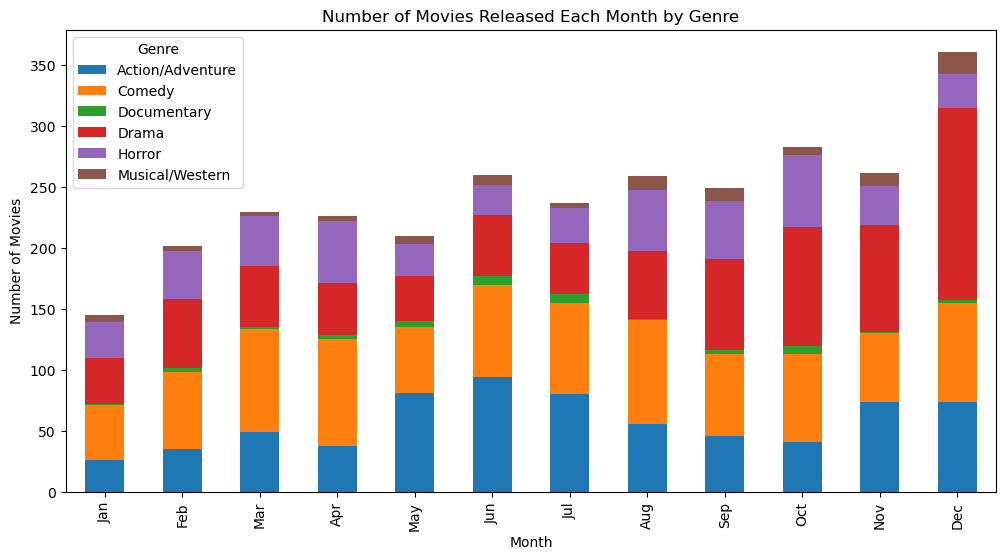

In [18]:
genre_month_counts = movies_data.groupby(['genre', 'Month']).size().unstack()

genre_month_counts.transpose().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Movies Released Each Month by Genre')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Genre')
plt.show()

**Hint:** 

1. Use [barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html) with *estimator* as `len`

2. Use the *hue* argument

####  
Based on the above plot, which `genre` is the most popular during the most profitable season of release? And which genre is the most popular during the least profitable season of release?

*(2 points)*

Based on the plot, the most popular genre during the first profitable season is **Action/Adventure** followed by **Comedy**. Because the major viewer group of the season is likely to be adolescents and young adults. These two types appeal to them. While during the second profitable season, **Drama** and **Comedy** gain popularity, because during the holiday seasons, the viewer groups are more heterogenous. People watch movies with their families, so the two genre have the largest range of potential audiences. 

### Month of release with proportion of movies in each genre
#### 
Visualize the proportion of movies in each `genre` for each month of release.

Use the code below to re-arrange your data that will help with creating the visualization

In [19]:
genre_proportion_release_month = pd.crosstab(index=movies_data['Month'],
                             columns=movies_data['genre'],
                             normalize="index")
genre_proportion_release_month.head()

genre,Action/Adventure,Comedy,Documentary,Drama,Horror,Musical/Western
Month,,,,,,
1,0.179310,0.310345,0.006897,0.262069,0.200000,0.041379
2,0.173267,0.311881,0.019802,0.277228,0.198020,0.019802
3,0.213043,0.369565,0.004348,0.217391,0.178261,0.017391
4,0.168142,0.384956,0.017699,0.185841,0.225664,0.017699
5,0.385714,0.257143,0.023810,0.176190,0.123810,0.033333


**Hint:** 

1. Make a 100% stacked barplot with the Pandas [plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function

2. Use the argument `bbox_to_anchor` with the Matplotlib function [legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) to place the legend outside the plot area.

*(8 points)*

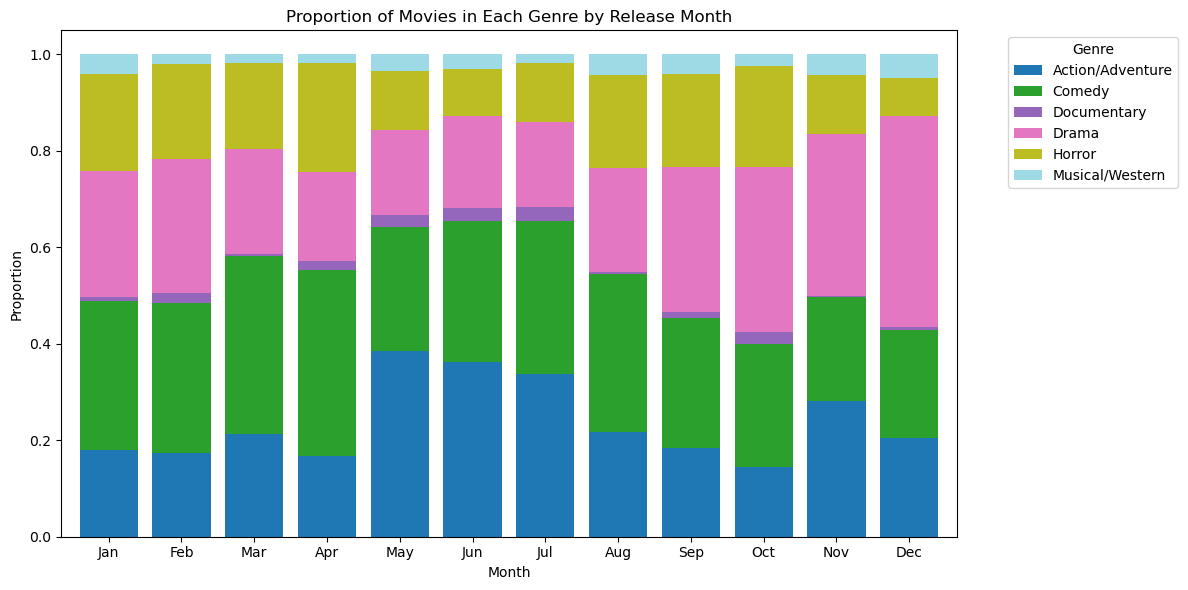

In [20]:
genre_proportion_release_month = pd.crosstab(index=movies_data['Month'],
                                            columns=movies_data['genre'],
                                            normalize="index")

# Plotting
ax = genre_proportion_release_month.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8, colormap='tab20')
plt.title('Proportion of Movies in Each Genre by Release Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 
Which `genre` is the most popular during the month of May, and which one is the most popular during December?

*(2 points)*

The most popular one in May is **Action/Adventure**. The most popular one in December is **Drama**

### Year of release with genre
#### 
Make an appropriate figure to visualize the average profit of movies of each `genre` for each year. Consider only the movies released from 1991 to 2010. Also show the 95% confidence interval in the average profit.

**Hint:**

1. Use the library `datetime` to extract year from `Release Date`.

2. Use the Seaborn [Facetgrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) object.

3. A figure can have multiple subplots. Put the figure for each genre in a separate subplot.

*(6 points)*

/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 9

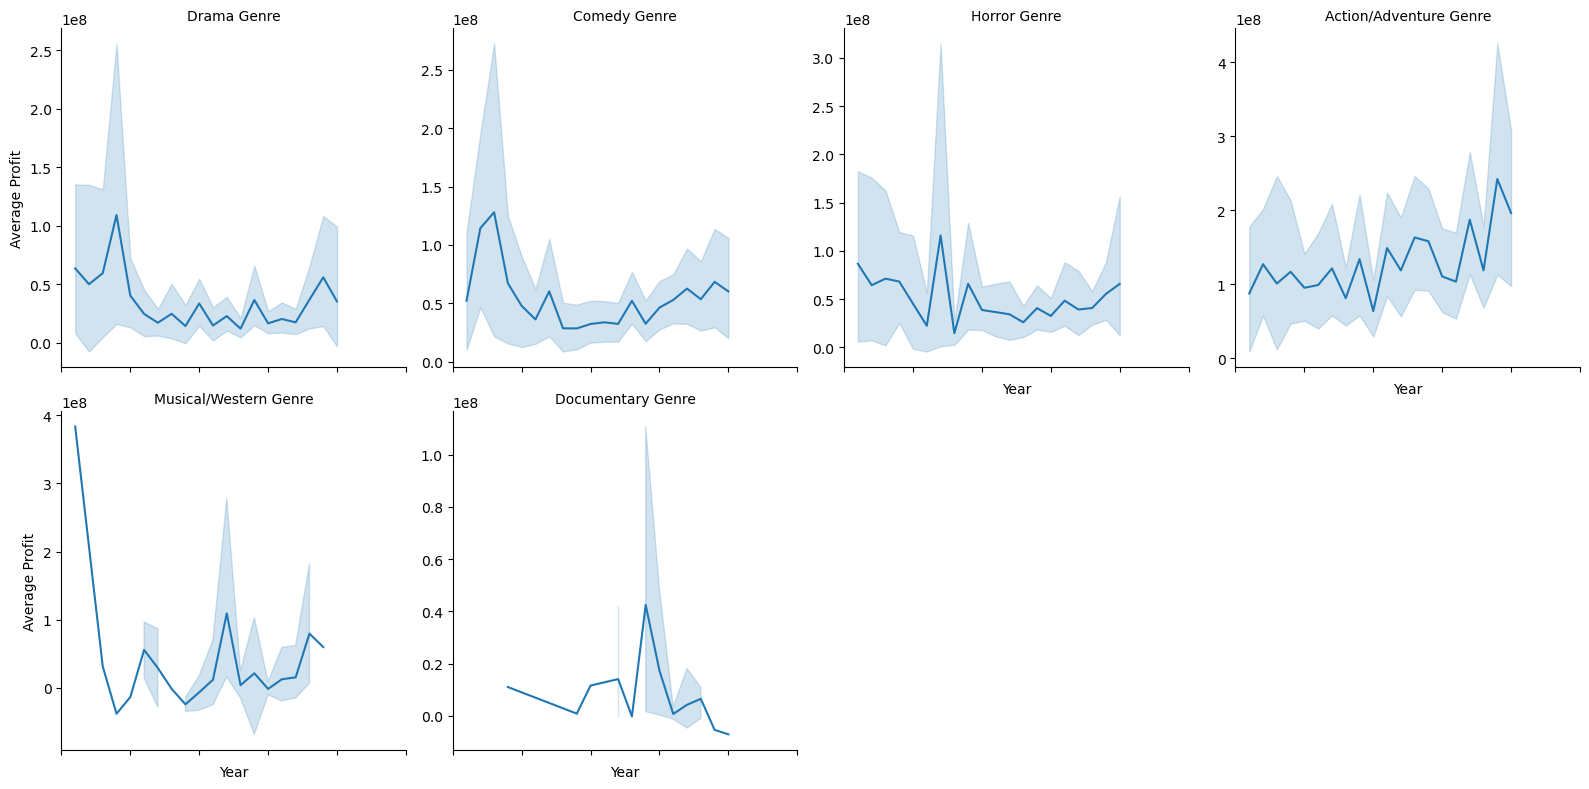

In [21]:
import seaborn as sns

movies_data['Year'] = movies_data['Release Date'].dt.year
movies_data_filtered = movies_data[(movies_data['Year'] >= 1991) & (movies_data['Year'] <= 2010)]

g = sns.FacetGrid(movies_data_filtered, col="genre", col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Profit', ci=95)
g.set_axis_labels("Year", "Average Profit")
g.set_titles(col_template="{col_name} Genre")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

#### 
Based on the figure above, which `genre`'s profitability seems to be increasing over the years, and which `genre` has the least uncertainty in profit for most of the years.


*(2 points)*

**Horror** seems to be increasing over the years. **Actions/Adventure** has the least uncertainty in profit for most of the years.



/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_2593/2851320192.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies_data.corr())


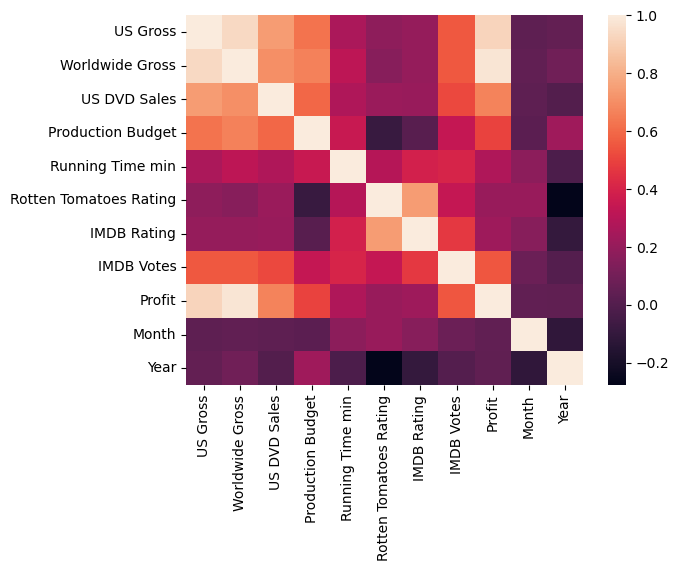

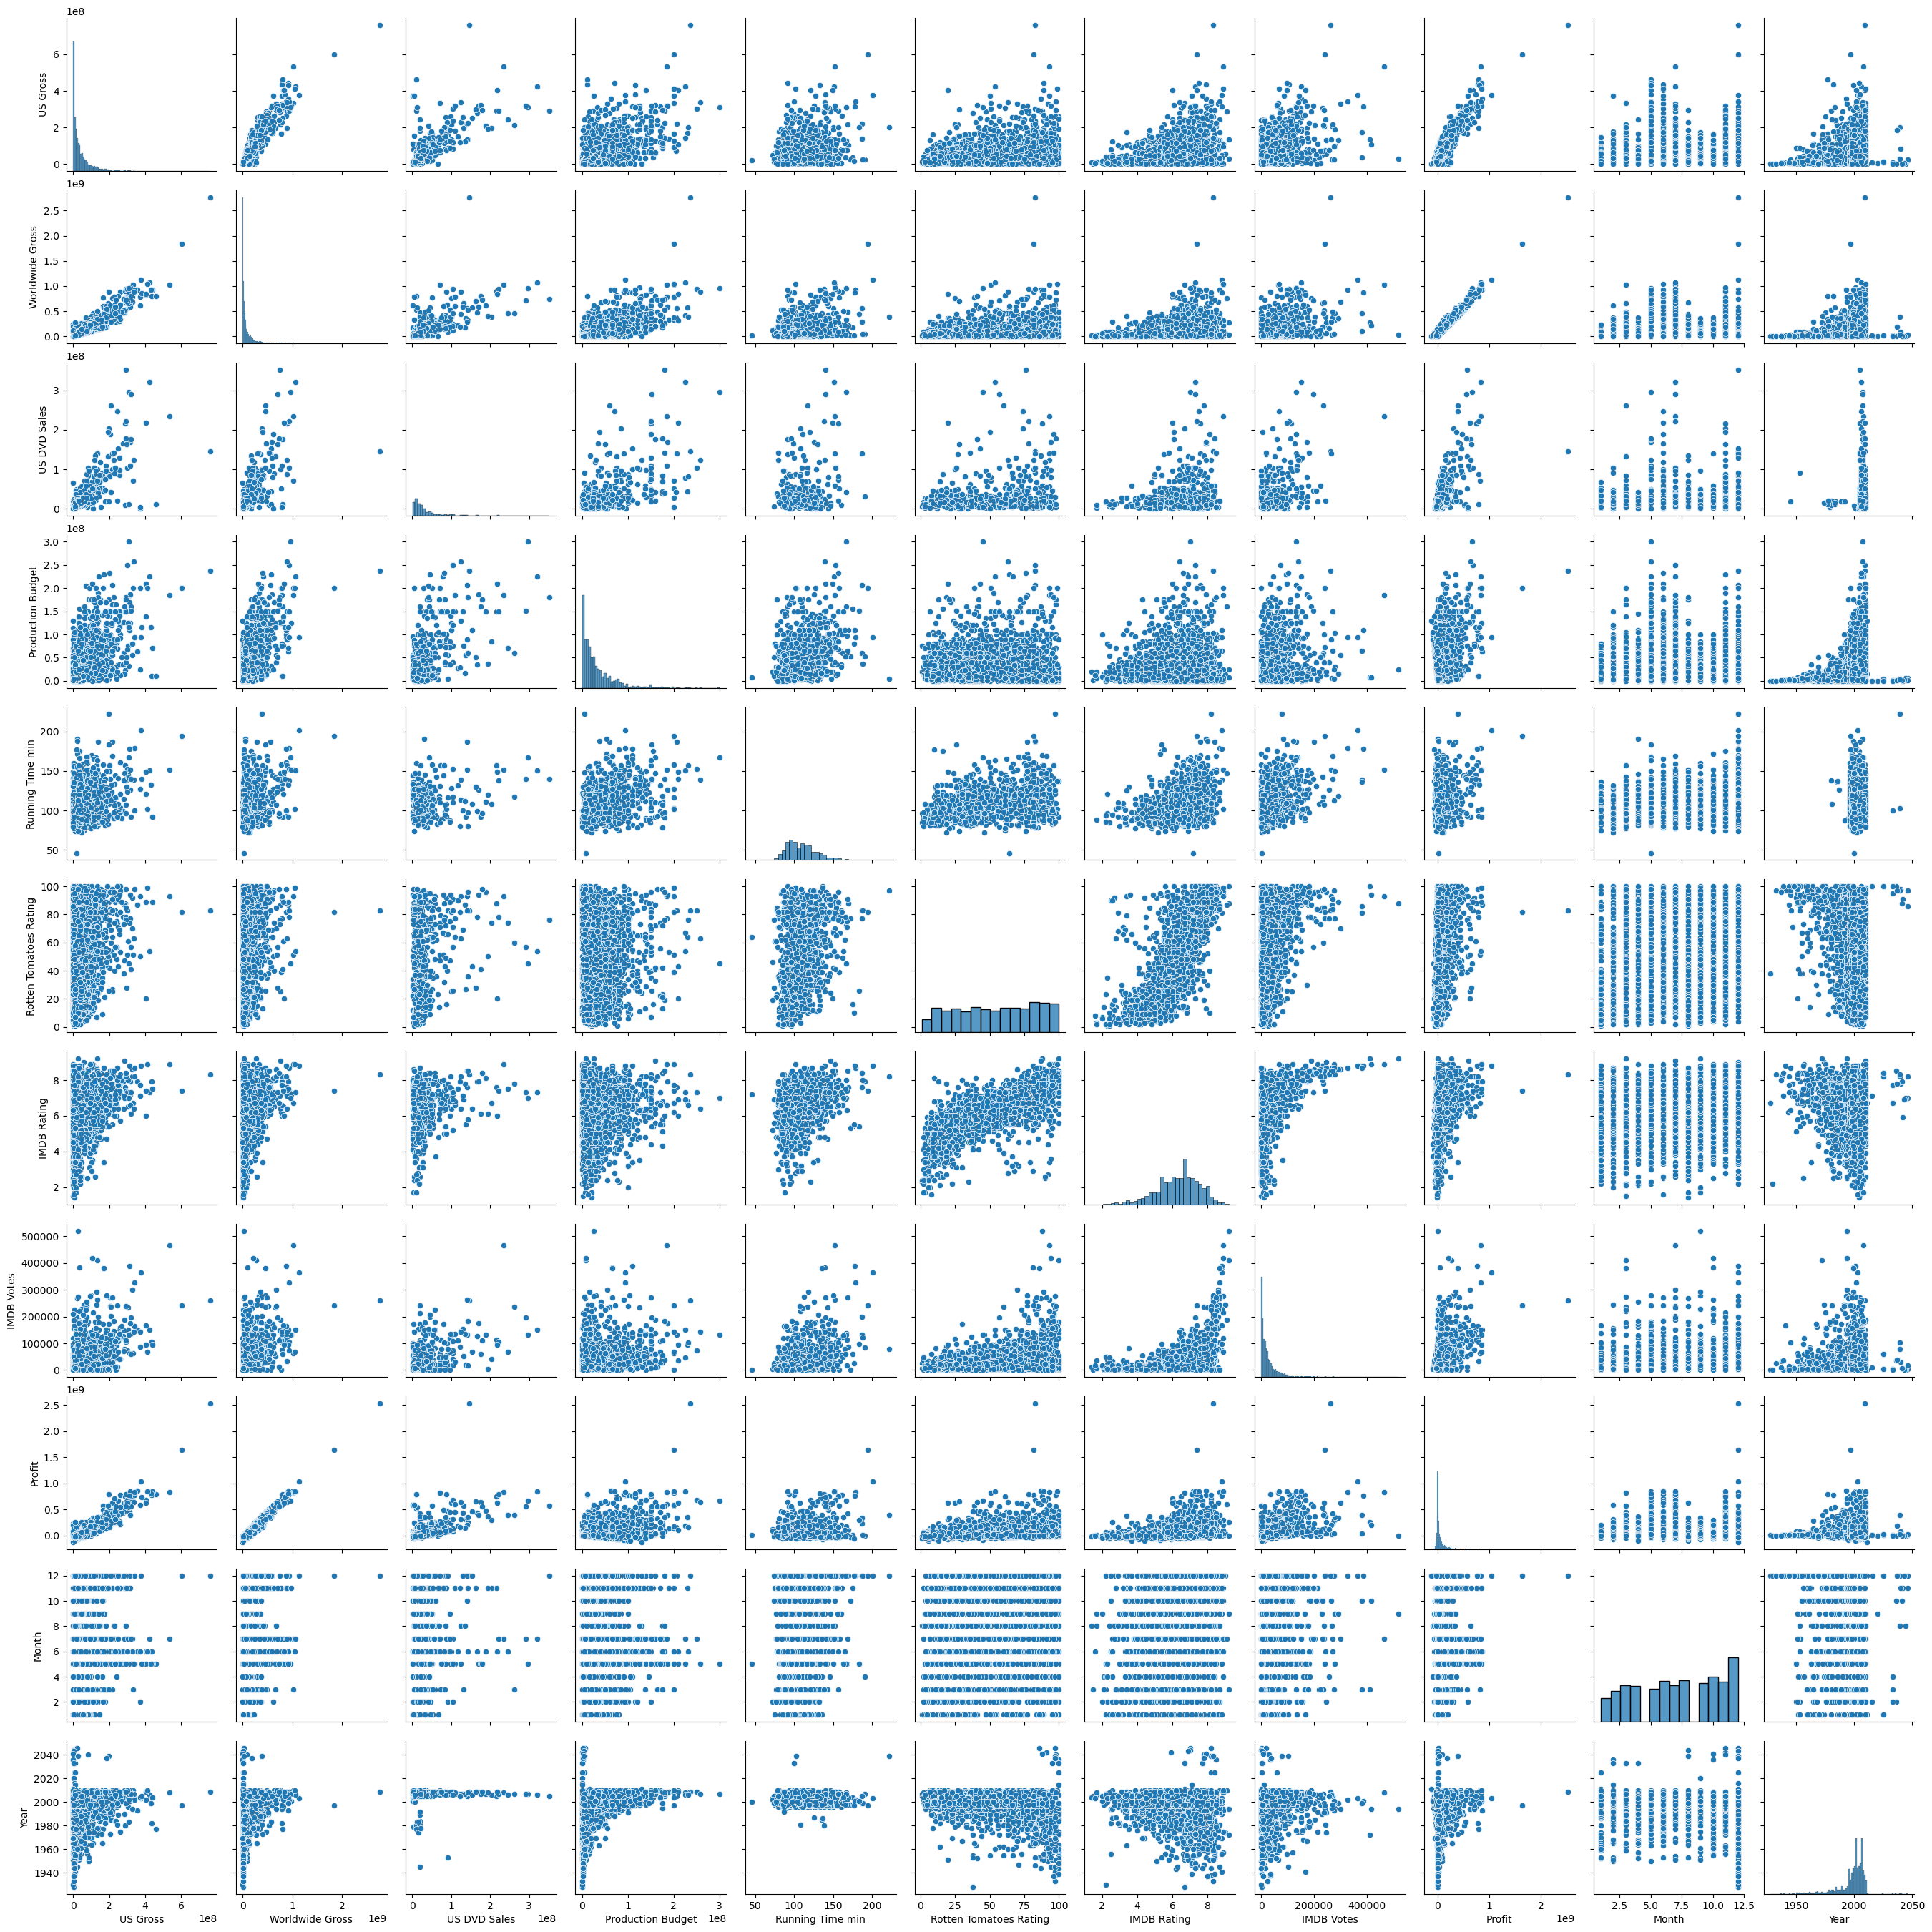

In [22]:
sns.heatmap(movies_data.corr())
plt.show()
sns.pairplot(movies_data)

## Associations

### Pairplot / heatmap

#### 
Make a pairplot and heatmap of all the continuous variables in the data.

*(8 points)*

In [23]:
movies_data['IMDB Rating'].unique

<bound method Series.unique of 0       6.1
1       6.9
2       6.8
3       NaN
4       3.4
       ... 
3196    7.0
3197    NaN
3198    3.4
3199    5.7
3200    6.7
Name: IMDB Rating, Length: 3193, dtype: float64>

In [26]:
movies_data.columns

Index(['Title', 'US Gross', 'Worldwide Gross', 'US DVD Sales',
       'Production Budget', 'Release Date', 'MPAA Rating', 'Running Time min',
       'Distributor', 'Source', 'Major Genre', 'Creative Type', 'Director',
       'Rotten Tomatoes Rating', 'IMDB Rating', 'IMDB Votes', 'Profit',
       'Month', 'genre', 'Year'],
      dtype='object')

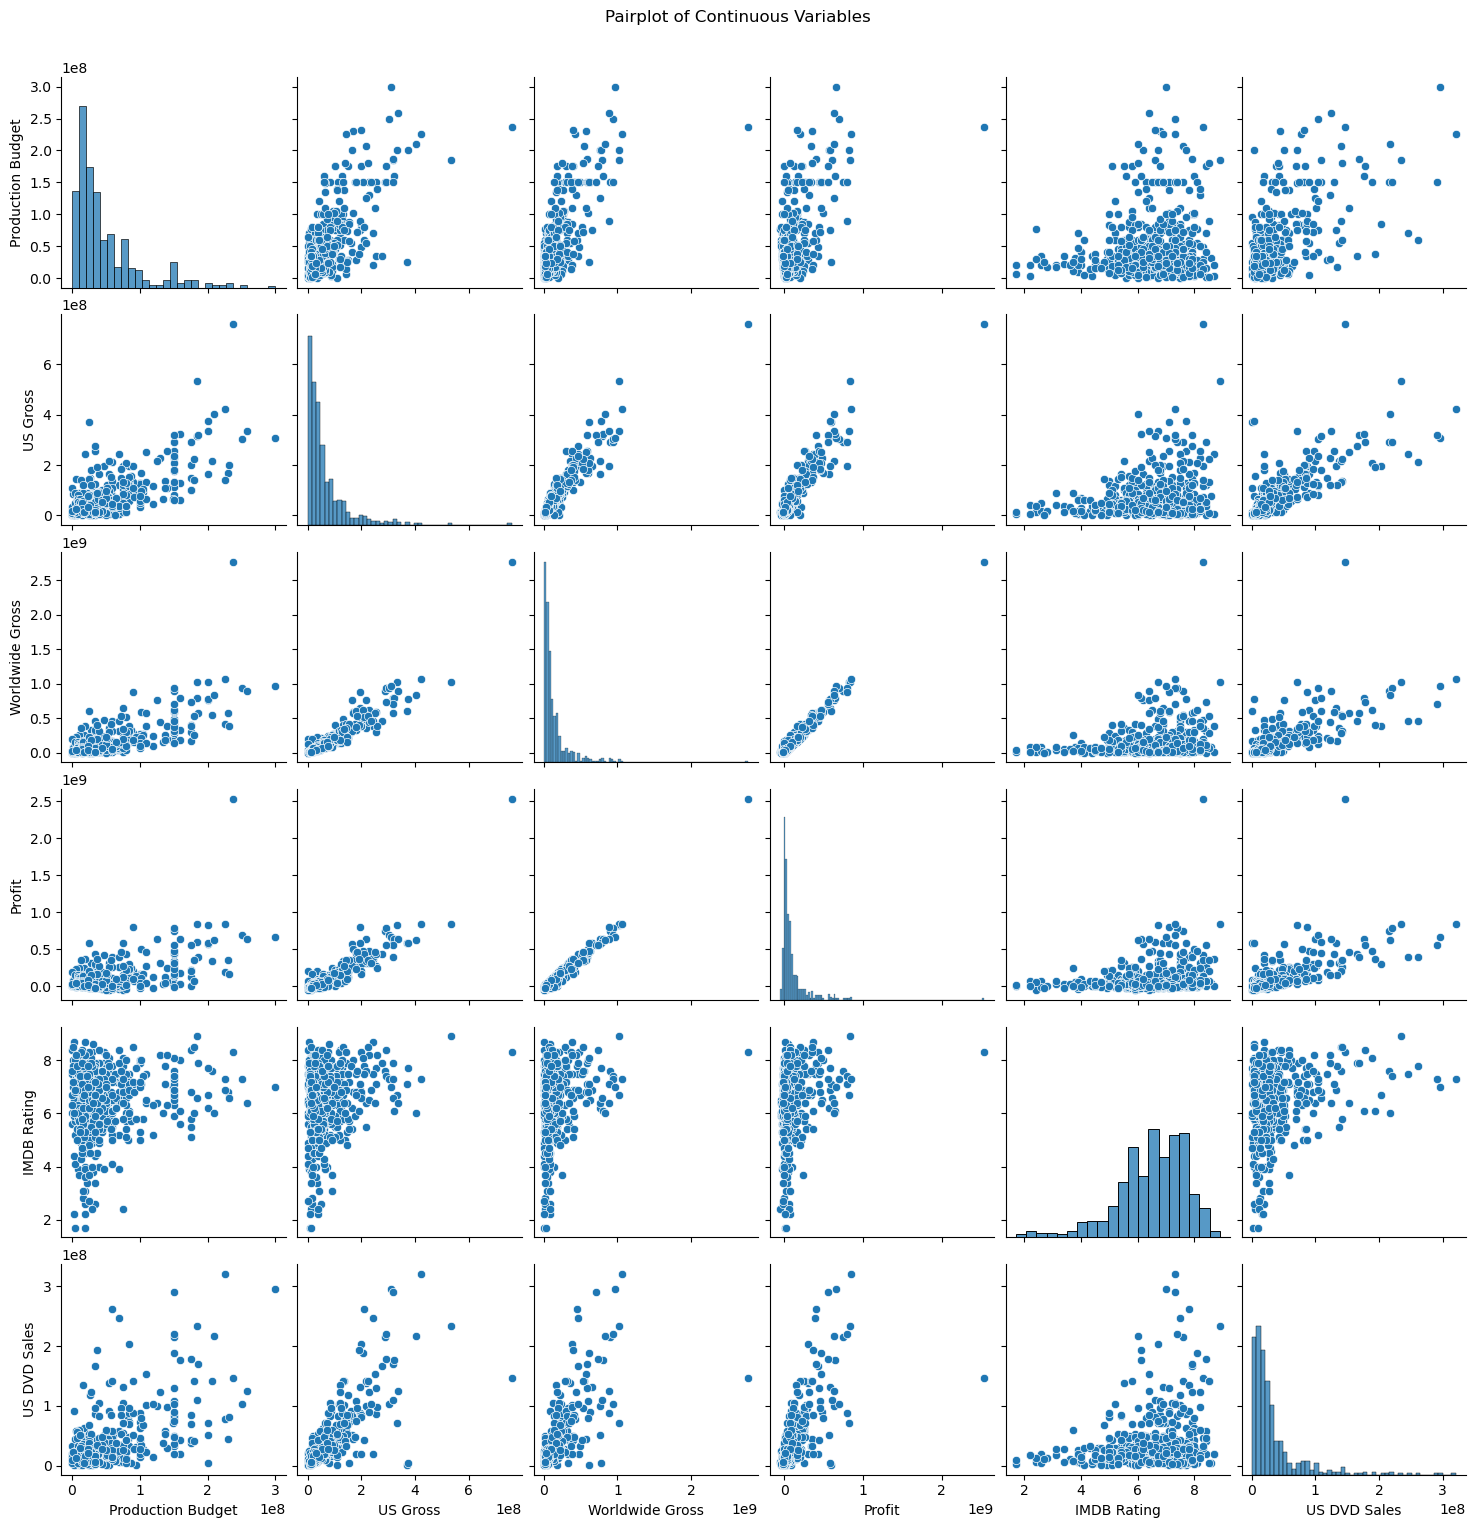

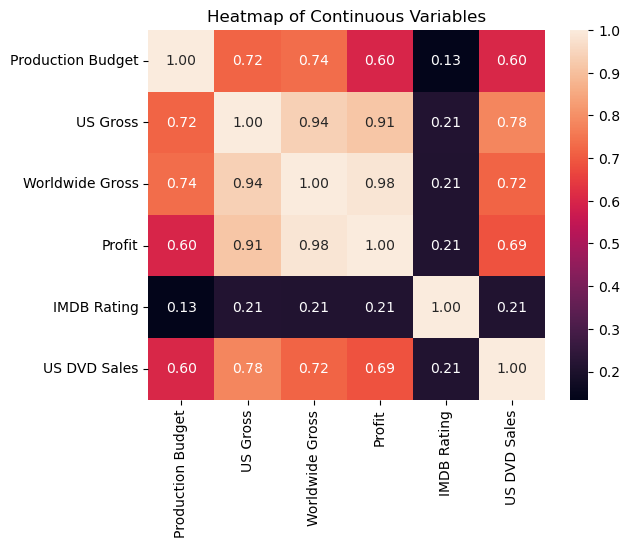

In [27]:
# Some category like IMDB voting and Running Time can be modified and used as categorical variable. 
# Without further information, I sorted out the the following variables which are always continuous for my answer. 
continuous_vars = movies_data[['Production Budget', 'US Gross', 'Worldwide Gross', 'Profit', 'IMDB Rating', 'Rotten Tomatoes Rating', 'MPAA Rating', 'US DVD Sales']]
continuous_vars = continuous_vars.dropna()


sns.pairplot(continuous_vars)
plt.suptitle('Pairplot of Continuous Variables', y=1.02)
plt.show()

corr_matrix = continuous_vars.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Heatmap of Continuous Variables')
plt.show()

####  
Are there any trends that you can see in the pairplot, but not in the heatmap?

*(2 points)*

Pairplot visually displays relationships between pairs of continuous variables, allowing us to see trends, patterns, and outliers in scatter plots.
Heatmap visually displays the correlation coefficients between pairs of continuous variables, allowing us to see the strength and direction of linear relationships.

The pair plot reveals the concentration of different observations, while the heatmap only shows the coefficient. If some samples spread widely across the distribution, we can see a very loose relationship between the independent and dependent variables through the scatter plot. For example, the left-most graph shows that most observations are concentrated in the left bottom section. We can not really see a convincing/obvious positive relationship looking at it, but the heat map suggests that the production budget has a positive correlation with all the other three. 

#### 
Based on the plots in 2(a)(i), which variables are associated with profit?

*(2 points)*


**US Gross**, **US DVD Sales**, and **World Gross** are positively associated with profit. They are variables that show a clear trend or pattern in relation to profit in the pairplot and have a high absolute correlation coefficient with profit in the heatmap.

#### 
Among the variables listed in 2(a)(iii), select a subset of variables such that none of them are highly associated with each other. The rest of the variables identified in 2(a)(iii) are redundant with regard to association with profit.

*(2 points)*

U.S. Gross is not highly associated with the Production Budget. It is highly associated with Profit. 
Worldwide Gross is not highly associated with the Production Budget. It is highly associated with Profit.
Profit is not highly associated with the Production Budget. Production Budget is redundant to determine the Profit. 

### Nested associations


#### 
Use the code below to create some new columns.

In [ ]:
movies_data['screenplay'] = movies_data.Source.apply(lambda x:'Non-original' if x!='Original Screenplay' else x)
movies_data['rating'] = movies_data['MPAA Rating'].apply(lambda x:'R rated' if x=='R' else 'Not R rated')
movies_data['fiction'] = movies_data['Creative Type'].apply(lambda x:'Contemporary' if x=='Contemporary Fiction' else 'other')

Make an appropriate figure to visualize the association of the number of IMDB votes with profit for each genre (use the variable `genre`). Which genre has the highest association between profit and IMDB votes?

*(8 points)*

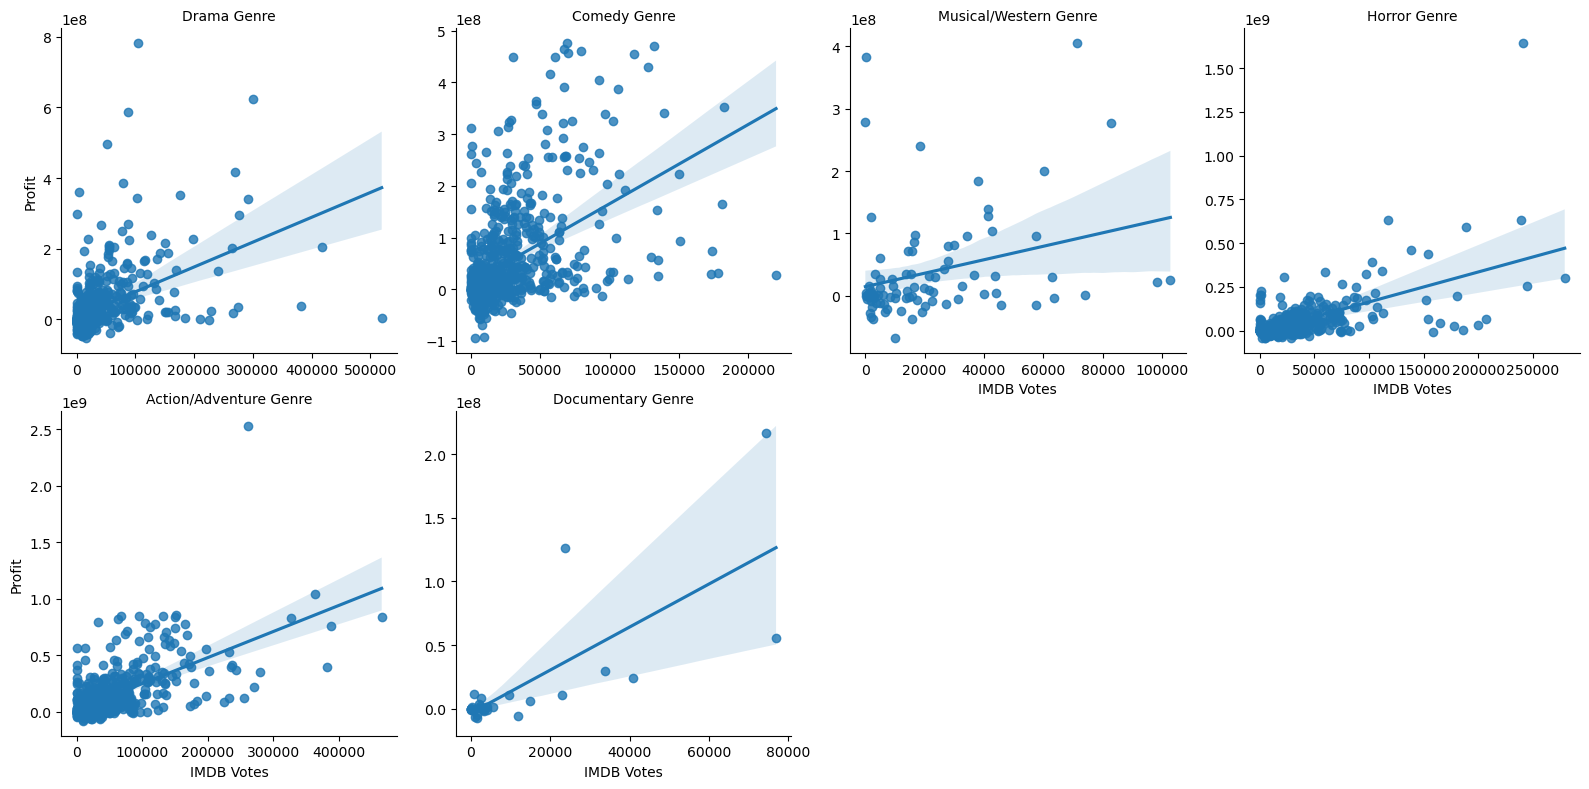

In [ ]:
movies_data = movies_data.dropna(subset=['IMDB Votes', 'Profit'])

g = sns.FacetGrid(movies_data, col="genre", col_wrap=4, height=4, sharey=False, sharex=False)
g.map(sns.regplot, 'IMDB Votes', 'Profit')
g.set_axis_labels("IMDB Votes", "Profit")
g.set_titles(col_template="{col_name} Genre")
plt.tight_layout()
plt.show()

In [ ]:
genre_correlations = movies_data.groupby('genre').apply(lambda x: x['IMDB Votes'].corr(x['Profit']))
genre_correlations

genre
Action/Adventure    0.628189
Comedy              0.490199
Documentary         0.759908
Drama               0.475671
Horror              0.603011
Musical/Western     0.294219
dtype: float64

**Documentary** shows a clear upward trend(the most steep slope), meaning that as the number of IMDB votes increases, the profit also tends to increase at a  comparatively more salient scale. 

#### 
Make an appropriate figure to visualize the association between the number of IMDB votes and profit, for each combination of the fiction type (use the variable `fiction`) and the movie rating (use the variable `rating`).

For which combination of `fiction` and `rating` categories do you observe the highest association between IMDB votes and profit?

*(8 points)*

**Hint:** Use *row* and *col* attributes of the Seaborn [Facetgrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) object.

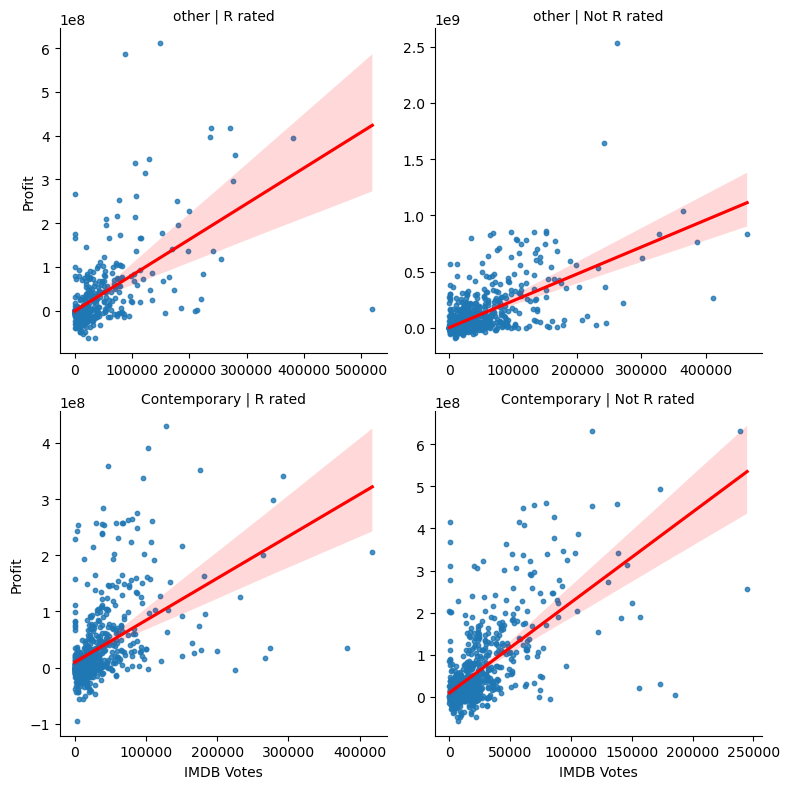

In [ ]:
g = sns.FacetGrid(movies_data, row="fiction", col="rating", height=4, sharey=False, sharex=False)
g.map(sns.regplot, 'IMDB Votes', 'Profit', scatter_kws={'s': 10}, line_kws={'color': 'red'})
g.set_axis_labels("IMDB Votes", "Profit")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()
plt.show()

In [ ]:
grouped_data = movies_data.groupby(['fiction', 'rating'])

correlation_coefficients = grouped_data.apply(lambda group: group[['IMDB Votes', 'Profit']].corr().iloc[0, 1])
correlation_coefficients

fiction       rating     
Contemporary  Not R rated    0.644792
              R rated        0.489156
other         Not R rated    0.640152
              R rated        0.582098
dtype: float64

**Contemporary Fiction- Not R rated** has the highest association between IMDB votes and profit.

### Profit based on movie director

#### 
Consider the directors who have directed more than 10 movies (based on the dataset). Make a horizontal barplot that shows the mean profit of the movies of these directors along with the 95% confidence interval. Sort the bars of the barplot such that the  director with the highest mean profit is at the top.

If the dataset `director_with_more_than_10_movies` has only those movies that correspond to directors with more than 10 movies, then the following code will give you the order in which the names of the directors must appear in the barplot:

*(8 points)*

/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_48097/2425434583.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


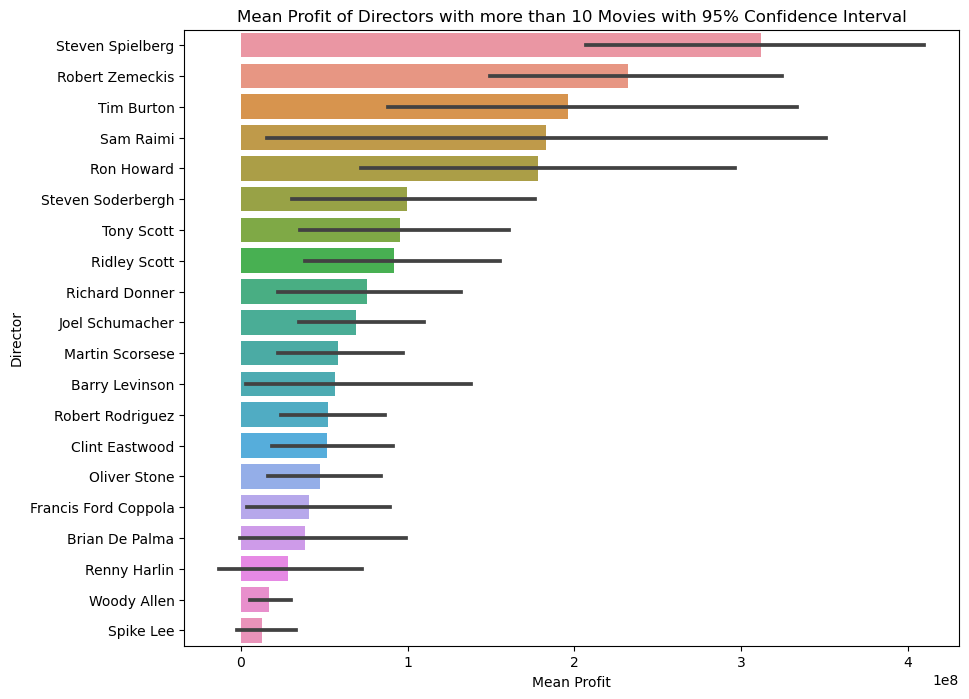

In [ ]:

director_counts = movies_data['Director'].value_counts()
directors_more_than_10 = director_counts[director_counts > 10].index

director_with_more_than_10_movies = movies_data[movies_data['Director'].isin(directors_more_than_10)]

# Creating the barplot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=director_with_more_than_10_movies,
    y='Director',
    x='Profit',
    order=director_with_more_than_10_movies[['Director','Profit']].groupby('Director').mean().sort_values(by='Profit', ascending=False).index,
    ci=95
)
plt.xlabel('Mean Profit')
plt.ylabel('Director')
plt.title('Mean Profit of Directors with more than 10 Movies with 95% Confidence Interval')
plt.show()


In [ ]:
director_with_more_than_10_movies[['Director','Profit']].groupby('Director').mean().sort_values(by = 'Profit',
                                            ascending= False).index.to_list()

['Steven Spielberg',
 'Robert Zemeckis',
 'Tim Burton',
 'Sam Raimi',
 'Ron Howard',
 'Steven Soderbergh',
 'Tony Scott',
 'Ridley Scott',
 'Richard Donner',
 'Joel Schumacher',
 'Martin Scorsese',
 'Barry Levinson',
 'Robert Rodriguez',
 'Clint Eastwood',
 'Oliver Stone',
 'Francis Ford Coppola',
 'Brian De Palma',
 'Renny Harlin',
 'Woody Allen',
 'Spike Lee']

#### 
Based on the above plot, which director has the highest mean profitability, and which one has the highest variation in profitability?

*(2 points)*

Steven Spielberg has the highest mean profit. Sam Raimi has the widest confidence interval, so he has the highest  variation in profitability. 

## Distributions

### Distribution of profit based on genre (boxplots)
#### 
Make boxplots to visualize the distribution of `profit` based on `genre`. Based on the plot, which genre has the most profitable movies?

*(6 points)*

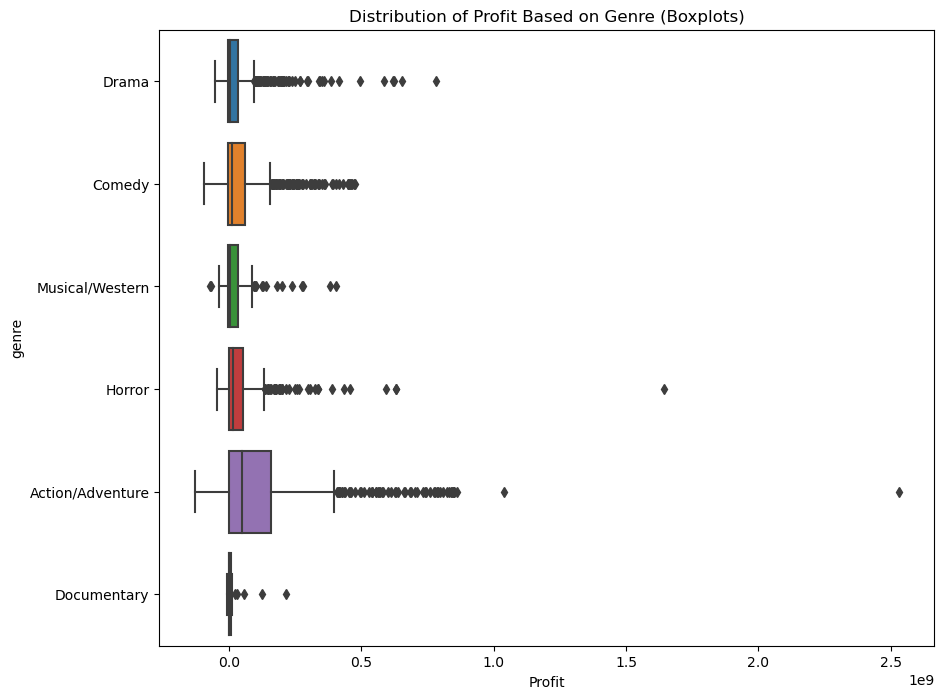

In [ ]:
# D.3.1.1 Boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(data=movies_data, x='Profit', y='genre')
plt.title('Distribution of Profit Based on Genre (Boxplots)')
plt.xlabel('Profit')
plt.ylabel('genre')
plt.show()

**Action/Adventure** has the most profitable movie. 

#### 
Which genre has the most variation in profit, and which one has the least?

*(2 points)*

**Action/Adventure** has the most variation in profit. **Documentary** has the least variation. 

### Distribution of profit based on genre (density plots)
#### 
Make density plots of `profit` based on `genre`. Adjust the limit on the horizonal axis, so that the plots are clearly visible.

*(6 points)*

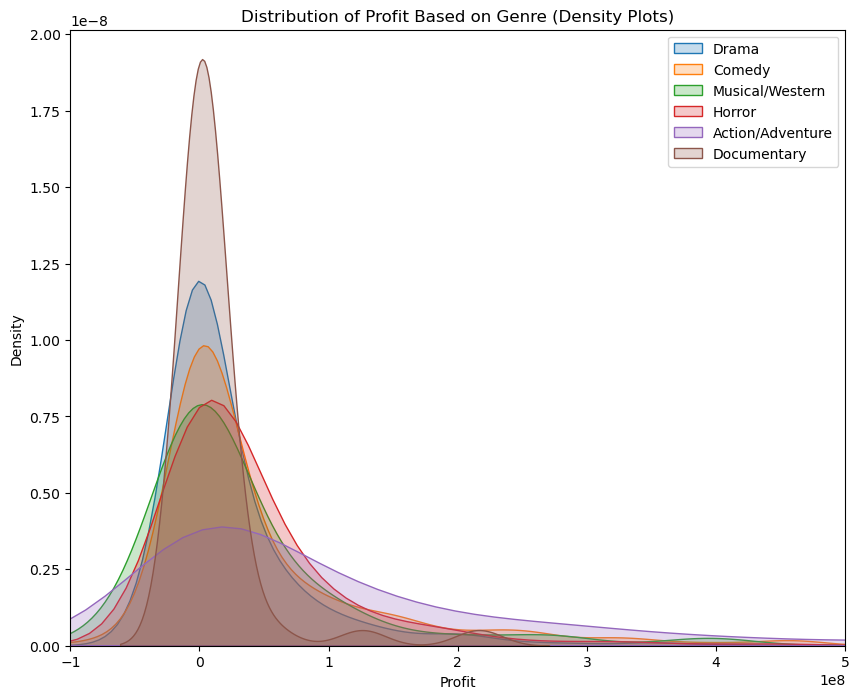

In [ ]:
plt.figure(figsize=(10, 8))
for genre in movies_data['genre'].unique():
    if pd.notna(genre):
        sns.kdeplot(movies_data[movies_data['genre'] == genre]['Profit'], label=genre, fill=True)
plt.title('Distribution of Profit Based on Genre (Density Plots)')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.xlim(-100000000, 500000000)  # Adjust the limit on the horizontal axis
plt.legend()
plt.show()

#### 
What additional insight / trend can you seen in the above plot that you cannot see with the boxplots?

*(2 points)*

The density plot clearly shows the mode(s) of the distribution. If a genre has multiple peaks （like documentary), it indicates that there are multiple common profit values for movies in that genre. The density plot can visually represent the skewness of the distribution. It shows whether the profit distribution of a genre is symmetric, right-skewed (long tail towards higher profits), or left-skewed (long tail towards lower profits). In the graph, all distributions are left- skewed, which is not previously reviewed by the boxplot. 

## Insights

From all the visualizations above, describe the insights you get about the factors associated with the profitability of a movie. 

Also, elaborate on the extent to which these trends can be generalized. For example, comment on whether these trends be generalized to the current time and all the Hollywood movies? If not, is there any time period or type of movie to which these trends can be applicable?

*(4+ 4 points)*


Upon analyzing various visualizations derived from the movie dataset, several insightful trends emerge regarding the factors associated with a movie's profitability. The profitability of the action/ adventure genre is leading the industry across different years. Notably, [genre, director, or IMDB ratings] appear to have a substantial impact, demonstrating [average profits genres. Furthermore, the influence of release season is also evident, revealing that movies that are out in summer and the holiday seasons have higher box office returns.  A strong IMDB rating does not necessarily correlate with higher profitability. Although we see a positive correlation， the magnitude of the coefficient is surprisingly low.

Regarding the generalization of these trends, caution is advised. The cinematic landscape can be constantly evolving, potentially limiting the applicability of these insights to the current era. Moreover, the targeted audiences of the same genre can be different depending on the age group, the trends may not universally apply across diverse movie categories and global cinemas. Thus, while the observed patterns offer valuable perspectives, their broader applicability may be constrained by temporal, geographical, and cinematic variations.

# Bonus question: Stock Market {-}

This question is worth 20 points. However, there is no partial credit. It will be 20 or 0.

The stock market is made up of exchanges, such as the New York Stock Exchange and the Nasdaq. Stocks are listed on a specific exchange, which brings buyers and sellers together and acts as a market for the shares of those stocks. The exchange tracks the supply and demand — and directly related, the price — of each stock.

A market index tracks the performance of a group of stocks, which either represents the market as a whole or a specific sector of the market, like technology or retail companies. You’re likely to hear most about the S&P 500, the Nasdaq composite and the Dow Jones Industrial Average; they are often used as proxies for the performance of the overall market.

There are two types of investment stratigies: active and passive.

### Active investing {-}
An active investment strategy involves using the information acquired by expert stock analysts to actively buy and sell stocks with specific characteristics. The goal is to beat the results of the indices and general stock market with higher returns and/or lower risk.

### Passive Investing {-}
Passive investors have a buy-and-hold mentality that focuses on benefitting from the overall increase in market prices over time. One of the major benefits of passive investing is that it minimizes the mistakes investors can make when they react emotionally to every move of the stock market.

The easiest way to implement a passive approach is to buy and hold an index fund that follows one of the major indices like the S&P 500, Dow Jones, or Russell 2000 (small-cap stocks). These funds pool money from multiple investors to buy the individual stocks, bonds, or securities that make up their market index. When the index changes its components, the index funds that follow it also switch up their holdings to match.

### Tasks {-}
In this exercise, we use S&P 500 index as an example to explore the gains/returns for passive invesement. 

### Return {-}

The data is provided in a csv file, with dates roughly from 2000 to 2022. And we use the column **Close** as the **price** on a specific day. 

If we buy the index on $t_1$ and sell it on $t_2$, the **return** is defined as
$$r_{t_1,t_2} = (P_{t_2}-P_{t_1})/P_{t_1}$$.

Sometimes we are interested on the return on holding the index for a specific period $T$, the return is
$$r_{t,T} = (P_{t+T}-P_{t})/P_{t}$$
where $t$ is the date we buy the stock and $T$ is the holding period. 
Since the stock is not traded on every day, when calculating ${t+T}$ we simply skip the non-trading dates. 

### Risk {-}

If we take the return as a random variable, we could use standard deviation as its risk. A risk-averse investor expects a stable (low volatility) return. 

### Sharpe Ratio {-}

People like high return and low risk investment. But on the other hand, in the market high return always associates high risk (e.g. stock) and low risk means low return (e.g. treasury bonds). 

The Sharpe ratio compares the excess return of an investment with its risk to make a single measure:
$$SR=(R-R_f)/\sigma$$
where $R$ and $\sigma$ are the expected return and stddev for the investment and $R_f$ is the risk free rate. 

Risk free rate is the rate of return offered by an investment that carries zero risk. In reality there is no truly risk free rate, but we usually take something like three-month U.S. Treasury bill as a proxy as risk free rate.
To be simple, in this exercise we just **take risk free rate as 0**. 


**Read the data from sp500.csv.** The dataset can be found in the Datasets section of the book.

## Return on investment

### Impatient investor (daily)

Suppose there is an investor who only holds the index for a single day (buy yesterday sell today). 

Based on the data, 

#### 
Show the histogram graph for all the possible returns. 

#### 
What is the expected return, risk and sharpe ratio? 

#### 
Is the return significantly greater than zero (a.k.a positive return) (use a threshold 0.01 for $p$-value) ?

**HINT**: use `scipy.stats.ttest_1samp` to do one-sided mean test. (We ignore the fact that *T-test* requires the data are sampled from a population of normal distribution, which might not be true in this exercise) 


*(6 points)*

D.5.1.1 
Show the histogram graph for all the possible returns.

D.5.1.2 
What is the expected return, risk and sharpe ratio?

D.5.1.3 
Is the return significantly greater than zero (a.k.a positive return) (use a threshold 0.01 for 
-value) ?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 5.1
# Load the dataset
data = pd.read_csv('/Users/jinwens/Downloads/sp500.csv')


data.head()


,Date,Open,High,Low,Close
0,2021-08-24,4484.40,4492.81,4482.28,4486.23
1,2016-07-14,2157.88,2168.99,2157.88,2163.75
2,2001-10-02,1051.33,1051.33,1034.47,1051.33
3,2010-11-11,1213.04,1215.45,1204.49,1213.54
4,2014-06-10,1950.34,1950.86,1944.64,1950.79


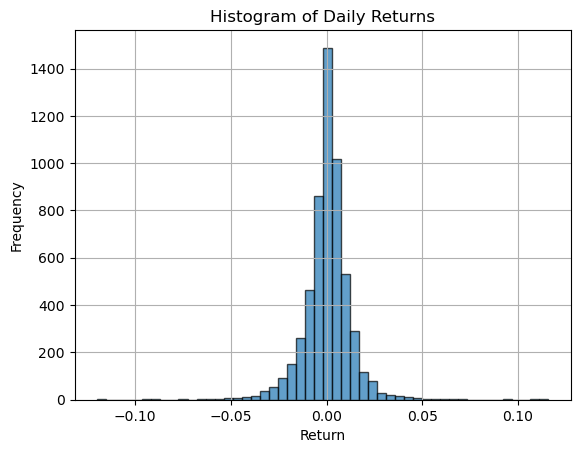

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Remove extra spaces in column names
data.columns = data.columns.str.strip()

# Daily Return
data['Return'] = data['Close'].pct_change()

# Drop rows with NaN values in 'Return' column (first row)
data = data.dropna(subset=['Return'])

# Plot histogram of the daily returns
plt.hist(data['Return'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# 5.1.2
# Calculate expected return, risk and Sharpe ratio
expected_return = data['Return'].mean()
risk = data['Return'].std()
sharpe_ratio = expected_return / risk

expected_return, risk, sharpe_ratio


(0.00024419162038510564, 0.012419029768756617, 0.01966269708117093)

Expected Return = 0.0244%

Risk (Standard Deviation) = 1.24%

Sharpe Ratio (S) = 0.01966

In [ ]:
# 5.1.3
from scipy.stats import ttest_1samp

# Perform one-sample t-test
t_stat, p_value_two_tailed = ttest_1samp(data['Return'], 0)

# One-tailed test, we need to divide the p-value by 2
p_value_one_tailed = p_value_two_tailed / 2

# Check if the return is significantly greater than zero
significant_return = p_value_one_tailed < 0.01

t_stat, p_value_one_tailed, significant_return


(1.4710273319906229, 0.07066997605887224, False)

T-Statistic = 1.471

One-Tailed P-Value = 0.071

Significant Positive Return: No, the return is not significantly greater than zero at a 
0.01 threshold for the p-value.

### Patient Investor (yearly)

Suppose there is an investor who will hold the index for a year (suppose there are 250 trading days in a year). 
Do the same analysis as the above:

#### 
Show the histogram graph for all the possible returns. 

#### 
What is the expected return, risk and sharpe ratio? 

#### 
Is the return significantly greater than zero (a.k.a positive return) (use a threshold 0.01 for $p$-value) ?

*(6 points)*

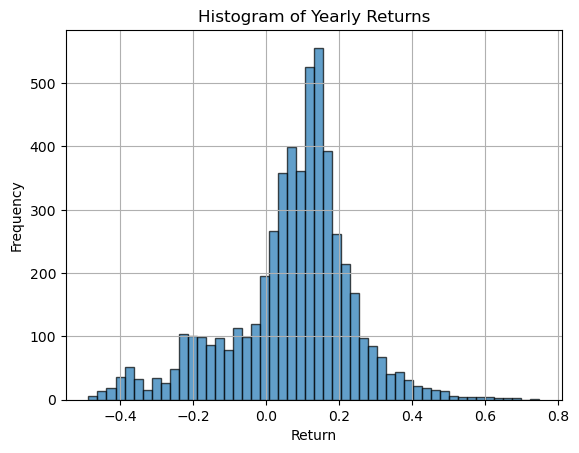

In [ ]:
# 5.2.1
# Calculate yearly returns
holding_period = 250
data['Yearly_Return'] = data['Close'].pct_change(periods=holding_period)

data_yearly = data.dropna(subset=['Yearly_Return'])

# Plot histogram of the yearly returns
plt.hist(data_yearly['Yearly_Return'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Yearly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# 5.2.2

expected_return_yearly = data_yearly['Yearly_Return'].mean()
risk_yearly = data_yearly['Yearly_Return'].std()
sharpe_ratio_yearly = expected_return_yearly / risk_yearly

expected_return_yearly, risk_yearly, sharpe_ratio_yearly

(0.07082314598226248, 0.16847654554340138, 0.42037392061803447)

Expected Return = 7.08% 

Risk (Standard Deviation) = 16.85%

Sharpe Ratio (S) = 0.4204

In [ ]:
# 5.2.3
t_stat_yearly, p_value_two_tailed_yearly = ttest_1samp(data_yearly['Yearly_Return'], 0)

# Since we are doing a one-tailed test, we need to divide the p-value by 2
p_value_one_tailed_yearly = p_value_two_tailed_yearly / 2

# Check if the yearly return is significantly greater than zero
significant_return_yearly = p_value_one_tailed_yearly < 0.01

t_stat_yearly, p_value_one_tailed_yearly, significant_return_yearly

(30.7390794360697, 1.6288154028590484e-191, True)

T-Statistic = 30.7391

One-Tailed P-Value = 1.6288

Significant Positive Return: Yes, the return is  significantly greater than zero at a 
0.01 threshold for the p-value.

### From daily to yearly 

Explore how the expected return/risk/shape ratio change as we increase our holding period from 1 day to 1 year(250 days).

Show/answer:

#### 
At least how many days do you need to hold the index in order to make a significant positive return (threshold 0.01)?

#### 
How are the returns associated with the risks for different investment strategies?

#### 
Make a graph as shown below.

*(18 points)*

In [ ]:
def is_significant_return(returns, alpha=0.01):
    t_stat, p_value_two_tailed = ttest_1samp(returns, 0)
    p_value_one_tailed = p_value_two_tailed / 2
    return p_value_one_tailed < alpha

# Finding the minimum holding period for significant positive return
min_holding_period = None
for period in range(1, holding_period+1):
    data['Return_Period'] = data['Close'].pct_change(periods=period)
    data_period = data.dropna(subset=['Return_Period'])
    if is_significant_return(data_period['Return_Period']):
        min_holding_period = period
        break

min_holding_period

3

**5.3.1**
The index must be held for at least 3 days to achieve a significant positive return at a threshold of 0.01.

**5.3.2** I'll calculate the expected returns and risks for holding periods ranging from 1 day to 250 days and then analyze the relationship between them.

In [ ]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/bonus.jpg",width=675)

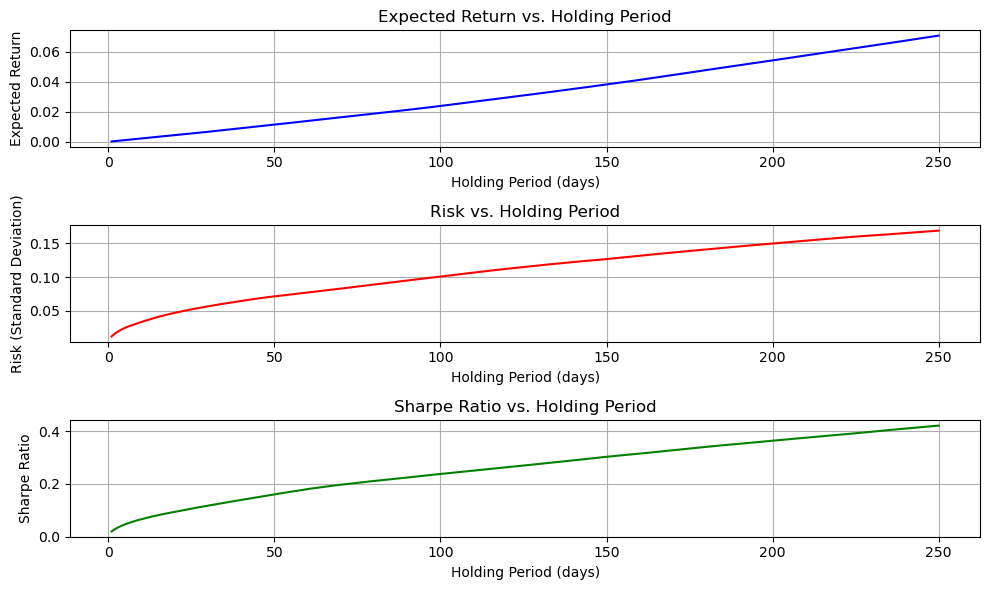

In [ ]:
# Lists to store the calculated values
holding_periods = []
expected_returns = []
risks = []
sharpe_ratios = []

# Calculate expected return, risk, and Sharpe ratio for different holding periods
for period in range(1, holding_period+1):
    holding_periods.append(period)
    data['Return_Period'] = data['Close'].pct_change(periods=period)
    data_period = data.dropna(subset=['Return_Period'])
    
    
    expected_return_period = data_period['Return_Period'].mean()
    risk_period = data_period['Return_Period'].std()
    sharpe_ratio_period = expected_return_period / risk_period if risk_period != 0 else None
    
    
    expected_returns.append(expected_return_period)
    risks.append(risk_period)
    sharpe_ratios.append(sharpe_ratio_period)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(holding_periods, expected_returns, label='Expected Return', color='blue')
plt.title('Expected Return vs. Holding Period')
plt.xlabel('Holding Period (days)')
plt.ylabel('Expected Return')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(holding_periods, risks, label='Risk', color='red')
plt.title('Risk vs. Holding Period')
plt.xlabel('Holding Period (days)')
plt.ylabel('Risk (Standard Deviation)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(holding_periods, sharpe_ratios, label='Sharpe Ratio', color='green')
plt.title('Sharpe Ratio vs. Holding Period')
plt.xlabel('Holding Period (days)')
plt.ylabel('Sharpe Ratio')
plt.grid(True)

plt.tight_layout()
plt.show()


**5.3.3**
**Expected Return**: The expected return generally increases as the holding period increases. However, there are fluctuations, and the return doesn't always increase with a longer holding period.

Therefore, a holding period of at least 3 days is necessary to achieve a significant positive return.

**Risk**: The risk, measured as the standard deviation of returns, also generally increases with the holding period, reflecting the increased uncertainty associated with longer investment horizons.

The relationship between return and risk varies, and a longer holding period doesn't always lead to better risk-adjusted returns.

**Sharpe Ratio**: The Sharpe ratio, which adjusts returns for risk, tends to fluctuate. For some periods, the increase in expected return is not enough to compensate for the increased risk, leading to a lower Sharpe ratio. However, in some cases, the Sharpe ratio improves with a longer holding period, indicating a better risk-adjusted return.

The relationship between return and risk varies, and a longer holding period doesn't always lead to better risk-adjusted returns.
Evaluating the expected return, risk, and Sharpe ratio can help investors choose a suitable holding period based on their risk tolerance and investment objectives.​​